# Sentiment Classification & How To "Frame Problems" for a Neural Network

## 1. Curate a Dataset<a id='lesson_1'></a>
The cells from here until Project 1 include code Andrew shows in the videos leading up to mini project 1. We've included them so you can run the code along with the videos without having to type in everything.

In [45]:
def pretty_print_review_and_label(i):
    
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r')
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r')
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

**Note:** The data in `reviews.txt` we're using has already been preprocessed a bit and contains only lower case characters. If we were working from raw data, where we didn't know it was all lower case, we would want to add a step here to convert it. That's so we treat different variations of the same word, like `The`, `the`, and `THE`, all the same way.

In [46]:
len(reviews)

25000

In [47]:
reviews[1]

'story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comedy . a formal orchestra audience is turned into an insane  violent mob by the crazy chantings of it  s singers . unfortunately it stays absurd the whole time with no general narrative eventually making it just too off putting . even those from the era should be turned off . the cryptic dialogue would make shakespeare seem easy to a third grader . on a technical level it  s better than you might think with some good cinematography by future great vilmos zsigmond . future stars sally kirkland and frederic forrest can be seen briefly .  '

In [48]:
labels[1]

'NEGATIVE'

## 2. Develop a Predictive Theory<a id='lesson_2'></a>

In [49]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation<a id='project_1'></a>

There are multiple ways to implement these projects, but in order to get your code closer to what Andrew shows in his solutions, we've provided some hints and starter code throughout this notebook.

You'll find the [Counter](https://docs.python.org/2/library/collections.html#collections.Counter) class to be useful in this exercise, as well as the [numpy](https://docs.scipy.org/doc/numpy/reference/) library.

In [50]:
from collections import Counter
import numpy as np

We'll create three `Counter` objects, one for words from postive reviews, one for words from negative reviews, and one for all the words.

In [51]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

**TODO:** Examine all the reviews. For each word in a positive review, increase the count for that word in both your positive counter and the total words counter; likewise, for each word in a negative review, increase the count for that word in both your negative counter and the total words counter.

**Note:** Throughout these projects, you should use `split(' ')` to divide a piece of text (such as a review) into individual words. If you use `split()` instead, you'll get slightly different results than what the videos and solutions show.

In [52]:
for i in range(len(reviews)):
    
    if labels[i] == 'POSITIVE':
        for j in reviews[i].split():
            positive_counts[j] += 1
            total_counts[j] += 1
    else:        
        for j in reviews[i].split():
            negative_counts[j] += 1
            total_counts[j] += 1

Run the following two cells to list the words used in positive reviews and negative reviews, respectively, ordered from most to least commonly used. 

In [53]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common(10)

[('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025)]

In [54]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common(10)

[('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880)]

As you can see, common words like "the" appear very often in both positive and negative reviews. Instead of finding the most common words in positive or negative reviews, what you really want are the words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, you'll need to calculate the **ratios** of word usage between positive and negative reviews.

**TODO:** Check all the words you've seen and calculate the ratio of postive to negative uses and store that ratio in `pos_neg_ratios`. 
>Hint: the positive-to-negative ratio for a given word can be calculated with `positive_counts[word] / float(negative_counts[word]+1)`. Notice the `+1` in the denominator – that ensures we don't divide by zero for words that are only seen in positive reviews.

In [55]:
# Create Counter object to store positive/negative ratios
pos_neg_ratios = Counter()

for i in positive_counts:
    
    pos_neg_ratios[i] = positive_counts[i]/(negative_counts[i] + 1)

Examine the ratios you've calculated for a few words:

In [56]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0607993145235326
Pos-to-neg ratio for 'amazing' = 4.022813688212928
Pos-to-neg ratio for 'terrible' = 0.17744252873563218


Looking closely at the values you just calculated, we see the following:

* Words that you would expect to see more often in positive reviews – like "amazing" – have a ratio greater than 1. The more skewed a word is toward postive, the farther from 1 its positive-to-negative ratio  will be.
* Words that you would expect to see more often in negative reviews – like "terrible" – have positive values that are less than 1. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
* Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews – like "the" – have values very close to 1. A perfectly neutral word – one that was used in exactly the same number of positive reviews as negative reviews – would be almost exactly 1. The `+1` we suggested you add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later we'll be ignoring words that are too close to neutral anyway.

Ok, the ratios tell us which words are used more often in postive or negative reviews, but the specific values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

* Right now, 1 is considered neutral, but the absolute value of the postive-to-negative rations of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So we should center all the values around netural so the absolute value fro neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
* When comparing absolute values it's easier to do that around zero than one. 

To fix these issues, we'll convert all of our ratios to new values using logarithms.

**TODO:** Go through all the ratios you calculated and convert them to logarithms. (i.e. use `np.log(ratio)`)

In the end, extremely positive and extremely negative words will have positive-to-negative ratios with similar magnitudes but opposite signs.

In [57]:
# TODO: Convert ratios to logs

for i in pos_neg_ratios:
    
    pos_neg_ratios[i] = np.log(pos_neg_ratios[i])

Examine the new ratios you've calculated for the same words from before:

In [58]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.05902269426102881
Pos-to-neg ratio for 'amazing' = 1.3919815802404802
Pos-to-neg ratio for 'terrible' = -1.7291085042663878


If everything worked, now you should see neutral words with values close to zero. In this case, "the" is near zero but slightly positive, so it was probably used in more positive reviews than negative reviews. But look at "amazing"'s ratio - it's above `1`, showing it is clearly a word with positive sentiment. And "terrible" has a similar score, but in the opposite direction, so it's below `-1`. It's now clear that both of these words are associated with specific, opposing sentiments.

Now run the following cells to see more ratios. 

The first cell displays all the words, ordered by how associated they are with postive reviews. (Your notebook will most likely truncate the output so you won't actually see *all* the words in the list.)

The second cell displays the 30 words most associated with negative reviews by reversing the order of the first list and then looking at the first 30 words. (If you want the second cell to display all the words, ordered by how associated they are with negative reviews, you could just write `reversed(pos_neg_ratios.most_common())`.)

You should continue to see values similar to the earlier ones we checked – neutral words will be close to `0`, words will get more positive as their ratios approach and go above `1`, and words will get more negative as their ratios approach and go below `-1`. That's why we decided to use the logs instead of the raw ratios.

In [59]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common(10)

[('edie', 4.6913478822291435),
 ('antwone', 4.477336814478207),
 ('din', 4.406719247264253),
 ('gunga', 4.189654742026425),
 ('goldsworthy', 4.174387269895637),
 ('gypo', 4.0943445622221),
 ('yokai', 4.0943445622221),
 ('paulie', 4.07753744390572),
 ('visconti', 3.9318256327243257),
 ('flavia', 3.9318256327243257)]

In [60]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[:10]

[('boll', -4.969813299576001),
 ('uwe', -4.624972813284271),
 ('thunderbirds', -4.127134385045092),
 ('beowulf', -4.110873864173311),
 ('dahmer', -3.9889840465642745),
 ('wayans', -3.9318256327243257),
 ('ajay', -3.871201010907891),
 ('grendel', -3.871201010907891),
 ('awfulness', -3.6635616461296463),
 ('seagal', -3.644143560272545)]

## 1. Transforming Text into Numbers<a id='lesson_3'></a>
The cells here include code Andrew shows in the next video. We've included it so you can run the code along with the video without having to type in everything.

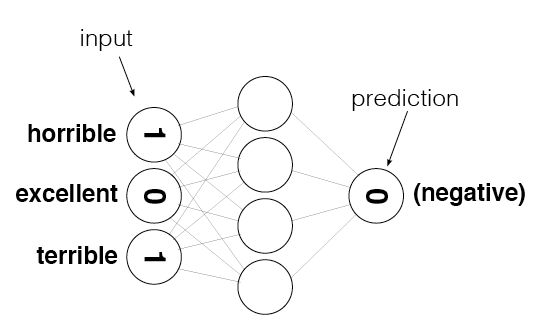

In [17]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='images/sentiment_network.png')

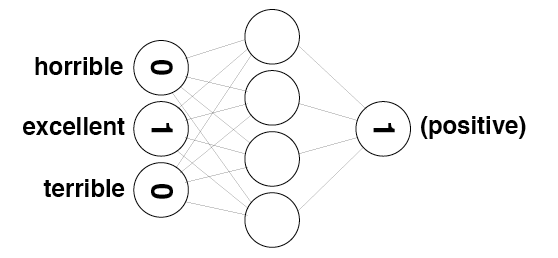

In [18]:
review = "The movie was excellent"

Image(filename='images/sentiment_network_pos.png')

## Project 2: Creating the Input/Output Data<a id='project_2'></a>

**TODO:** Create a set named `vocab` that contains every word in the vocabulary.

In [19]:
vocab = set()

for i in range(len(reviews)):
    
    for j in reviews[i].split():
        vocab.add(j)

Run the following cell to check your vocabulary size. If everything worked correctly, it should print **74074**

In [20]:
vocab_size = len(vocab)
print(vocab_size)

74073


Take a look at the following image. It represents the layers of the neural network you'll be building throughout this notebook. `layer_0` is the input layer, `layer_1` is a hidden layer, and `layer_2` is the output layer.

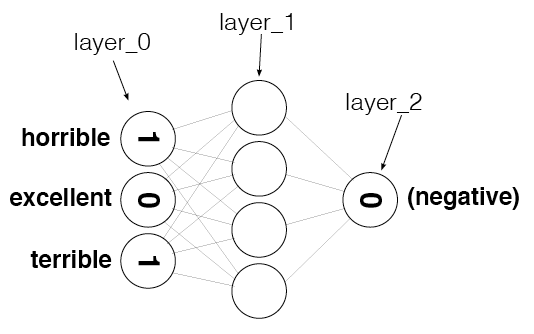

In [21]:
from IPython.display import Image
Image(filename='images/sentiment_network_2.png')

**TODO:** Create a numpy array called `layer_0` and initialize it to all zeros. You will find the [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) function particularly helpful here. Be sure you create `layer_0` as a 2-dimensional matrix with 1 row and `vocab_size` columns. 

In [22]:
layer_0 = np.zeros((1, vocab_size))
layer_0.shape

(1, 74073)

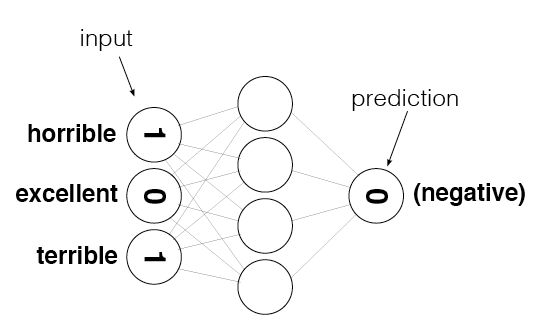

In [23]:
from IPython.display import Image
Image(filename='images/sentiment_network.png')

`layer_0` contains one entry for every word in the vocabulary, as shown in the above image. We need to make sure we know the index of each word, so run the following cell to create a lookup table that stores the index of every word.

In [24]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i
    
word2index['eye']

9805

**TODO:**  Complete the implementation of `update_input_layer`. It should count 
          how many times each word is used in the given review, and then store
          those counts at the appropriate indices inside `layer_0`.

In [25]:
def update_input_layer(review):

    global layer_0
    layer_0 *= 0
    
    for i in review.split():
        
        layer_0[0][word2index[i]] += 1

Run the following cell to test updating the input layer with the first review. The indices assigned may not be the same as in the solution, but hopefully you'll see some non-zero values in `layer_0`.  

In [26]:
update_input_layer(reviews[0])

print(layer_0)

[[0. 0. 0. ... 0. 0. 0.]]


**TODO:** Complete the implementation of `get_target_for_labels`. It should return `0` or `1`, 
          depending on whether the given label is `NEGATIVE` or `POSITIVE`, respectively.

In [27]:
def get_target_for_label(label):

    if label == 'POSITIVE':
        return 1
    return 0

Run the following two cells. They should print out`'POSITIVE'` and `1`, respectively.

In [28]:
labels[0]

'POSITIVE'

In [29]:
get_target_for_label(labels[0])

1

Run the following two cells. They should print out `'NEGATIVE'` and `0`, respectively.

In [30]:
labels[1]

'NEGATIVE'

In [31]:
get_target_for_label(labels[1])

0

## Project 3: Building a Neural Network<a id='project_3'></a>

**TODO:** We've included the framework of a class called `SentimentNetork`. Implement all of the items marked `TODO` in the code. These include doing the following:
- Create a basic neural network much like the networks you've seen in earlier lessons and in Project 1, with an input layer, a hidden layer, and an output layer. 
- Do **not** add a non-linearity in the hidden layer. That is, do not use an activation function when calculating the hidden layer outputs.
- Re-use the code from earlier in this notebook to create the training data (see `TODO`s in the code)
- Implement the `pre_process_data` function to create the vocabulary for our training data generating functions
- Ensure `train` trains over the entire corpus

In [75]:
import time
import sys
import numpy as np

class SentimentNetwork:
    
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):

        np.random.seed(1)
        self.pre_process_data(reviews, labels)
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        
        for review in reviews:
            for word in review.split():
                review_vocab.add(word)
        
        self.review_vocab = list(review_vocab)
        
        label_vocab = {'POSITIVE', 'NIGATIVE'}
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        
        for i, word in enumerate(review_vocab):
            self.word2index[word] = i
        
        self.label2index = {'POSITIVE':1, 'NEGATIVE':0}
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate

        self.l0 = np.zeros((1,input_nodes))
        self.w1 = np.random.rand(input_nodes, hidden_nodes)/10
        self.w2 = np.random.rand(hidden_nodes, output_nodes)/10
        
    def update_input_layer(self,review):

        self.l0 *= 0      
        for i in review.split():
            self.l0[0][self.word2index[i]] += 1
                
    def get_target_for_label(self,label):

        if label == 'POSITIVE':
            return 1
        return 0
        
    def sigmoid(self,x):
        
        return 1/(1+np.exp(-x))

    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        start = time.time()

        for i in range(len(training_reviews)):
            
            x = training_reviews[i]
            y = get_target_for_label(training_labels[i])
            
            self.update_input_layer(x)
  
            l1 = np.matmul(self.l0, self.w1)
            l2 = self.sigmoid(np.matmul(l1, self.w2))
        
            l2_error = (y-l2)
            l2_delta = l2_error*l2*(1-l2)
            
            l1_error = np.matmul(l2_delta, self.w2.T)
            l1_delta = l1_error
            
            self.w2 += self.learning_rate*np.matmul(l1.T, l2_delta)
            self.w1 += self.learning_rate*np.matmul(self.l0.T, l1_delta)
            
            if abs(y-l2) < 0.5:
                correct_so_far += 1

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            if((i+1)%200 == 0):
                sys.stdout.write("\rProgress:" + str(100 * (i+1)/float(len(training_reviews)))[:4] + 
                                 "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + 
                                 " Correct:" + str(correct_so_far) + " Trained:" + str(i+1) + 
                                 " Training Accuracy:" + str(correct_so_far * 100 / float(i))[:4] + "%")                
    
    def test(self, testing_reviews, testing_labels):

        correct = 0
        start = time.time()
        
        for i in range(len(testing_reviews)):
            
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            if((i+1)%200 == 0):
                sys.stdout.write("\rProgress:" + str(100 * (i+1)/float(len(testing_reviews)))[:4] + 
                                 "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + 
                                 " Correct:" + str(correct) + " Tested:" + str(i) + 
                                 " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
            sys.stdout.flush()
    
    def run(self, review):

        self.update_input_layer(review)
        l1 = np.matmul(self.l0, self.w1)
        l2 = self.sigmoid(np.matmul(l1, self.w2))
        
        if l2 > 0.5:
            return 'POSITIVE'
        return 'NEGATIVE'

In [76]:
mlp = SentimentNetwork(reviews,labels, learning_rate=0.1)

In [77]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:100.% Speed(reviews/sec):125.8 Correct:17445 Trained:24000 Training Accuracy:72.6%

In [78]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:100.% Speed(reviews/sec):495.5 Correct:787 Tested:999 Testing Accuracy:78.7%

## Project 4: Reducing Noise in Our Input Data<a id='project_4'></a>

**TODO:** Here instead of giving count or weight to each vector, we will just assign 1 to each word since most of the high couns word are useless. These useless words are like 'the', 'is', 'in', 'at' etc.

In [84]:
import time
import sys
import numpy as np

class SentimentNetwork:
    
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):

        np.random.seed(1)
        self.pre_process_data(reviews, labels)
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        
        for review in reviews:
            for word in review.split():
                review_vocab.add(word)
        
        self.review_vocab = list(review_vocab)
        
        label_vocab = {'POSITIVE', 'NIGATIVE'}
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        
        for i, word in enumerate(review_vocab):
            self.word2index[word] = i
        
        self.label2index = {'POSITIVE':1, 'NEGATIVE':0}
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate

        self.l0 = np.zeros((1,input_nodes))
        self.w1 = np.random.rand(input_nodes, hidden_nodes)/10
        self.w2 = np.random.rand(hidden_nodes, output_nodes)/10
        
    def update_input_layer(self,review):

        self.l0 *= 0      
        for i in review.split():
            self.l0[0][self.word2index[i]] = 1      # Here is the change
                 
    def get_target_for_label(self,label):

        if label == 'POSITIVE':
            return 1
        return 0
        
    def sigmoid(self,x):
        
        return 1/(1+np.exp(-x))

    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        start = time.time()

        for i in range(len(training_reviews)):
            
            x = training_reviews[i]
            y = get_target_for_label(training_labels[i])
            
            self.update_input_layer(x)
  
            l1 = np.matmul(self.l0, self.w1)
            l2 = self.sigmoid(np.matmul(l1, self.w2))
        
            l2_error = (y-l2)
            l2_delta = l2_error*l2*(1-l2)
            
            l1_error = np.matmul(l2_delta, self.w2.T)
            l1_delta = l1_error
            
            self.w2 += self.learning_rate*np.matmul(l1.T, l2_delta)
            self.w1 += self.learning_rate*np.matmul(self.l0.T, l1_delta)
            
            if abs(y-l2) < 0.5:
                correct_so_far += 1

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            if((i+1)%200 == 0):
                sys.stdout.write("\rProgress:" + str(100 * (i+1)/float(len(training_reviews)))[:4] + 
                                 "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + 
                                 " Correct:" + str(correct_so_far) + " Trained:" + str(i+1) + 
                                 " Training Accuracy:" + str(correct_so_far * 100 / float(i))[:4] + "%")                
    
    def test(self, testing_reviews, testing_labels):

        correct = 0
        start = time.time()
        
        for i in range(len(testing_reviews)):
            
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            if((i+1)%200 == 0):
                sys.stdout.write("\rProgress:" + str(100 * (i+1)/float(len(testing_reviews)))[:4] + 
                                 "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + 
                                 " Correct:" + str(correct) + " Tested:" + str(i) + 
                                 " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
            sys.stdout.flush()
    
    def run(self, review):

        self.update_input_layer(review)
        l1 = np.matmul(self.l0, self.w1)
        l2 = self.sigmoid(np.matmul(l1, self.w2))
        
        if l2 > 0.5:
            return 'POSITIVE'
        return 'NEGATIVE'

Run the following cell to recreate the network and train it. Notice we've gone back to the higher learning rate of `0.1`.

In [88]:
mlp = SentimentNetwork(reviews, labels, learning_rate=0.1)

mlp.train(reviews[:-1000],labels[:-1000])

Progress:100.% Speed(reviews/sec):125.4 Correct:19645 Trained:24000 Training Accuracy:81.8%

That should have trained much better than the earlier attempts. It's still not wonderful, but it should have improved dramatically. Run the following cell to test your model with 1000 predictions.

In [90]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:100.% Speed(reviews/sec):533.7 Correct:853 Tested:999 Testing Accuracy:85.3%

## Project 5: Making our Network More Efficient<a id='project_5'></a>
**TODO:** Make the `SentimentNetwork` class more efficient by eliminating unnecessary multiplications and additions that occur during forward and backward propagation. To do that, you can do the following:
* Copy the `SentimentNetwork` class from the previous project into the following cell.
* Remove the `update_input_layer` function - you will not need it in this version.
* Modify `init_network`:
>* You no longer need a separate input layer, so remove any mention of `self.layer_0`
>* You will be dealing with the old hidden layer more directly, so create `self.layer_1`, a two-dimensional matrix with shape 1 x hidden_nodes, with all values initialized to zero
* Modify `train`:
>* Change the name of the input parameter `training_reviews` to `training_reviews_raw`. This will help with the next step.
>* At the beginning of the function, you'll want to preprocess your reviews to convert them to a list of indices (from `word2index`) that are actually used in the review. This is equivalent to what you saw in the video when Andrew set specific indices to 1. Your code should create a local `list` variable named `training_reviews` that should contain a `list` for each review in `training_reviews_raw`. Those lists should contain the indices for words found in the review.
>* Remove call to `update_input_layer`
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* In the forward pass, replace the code that updates `layer_1` with new logic that only adds the weights for the indices used in the review.
>* When updating `weights_0_1`, only update the individual weights that were used in the forward pass.
* Modify `run`:
>* Remove call to `update_input_layer` 
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* Much like you did in `train`, you will need to pre-process the `review` so you can work with word indices, then update `layer_1` by adding weights for the indices used in the review.

In [213]:
import time
import sys
import numpy as np

class SentimentNetwork:
    
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):

        np.random.seed(1)
        self.pre_process_data(reviews, labels)
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        
        for review in reviews:
            for word in review.split():
                review_vocab.add(word)
        
        self.review_vocab = list(review_vocab)
        
        label_vocab = {'POSITIVE', 'NIGATIVE'}
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        
        for i, word in enumerate(review_vocab):
            self.word2index[word] = i
        
        self.label2index = {'POSITIVE':1, 'NEGATIVE':0}
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate

        self.l1 = np.zeros((1,hidden_nodes))
        self.w1 = np.random.rand(input_nodes, hidden_nodes)/10
        self.w2 = np.random.rand(hidden_nodes, output_nodes)/10
                 
    def get_target_for_label(self,label):

        if label == 'POSITIVE':
            return 1
        return 0
        
    def sigmoid(self,x):
        
        return 1/(1+np.exp(-x))   

    def train(self, training_reviews_raw, training_labels):
        
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split():
                indices.add(self.word2index[word])
            training_reviews.append(list(indices))    
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        start = time.time()

        for i in range(len(training_reviews)):
            
            self.l1 *= 0
            x = training_reviews[i]       
            y = get_target_for_label(training_labels[i])
            
            for index in x:    
                self.l1 += self.w1[index]
                
            # l1 = np.matmul(self.l0, self.w1)
            l2 = self.sigmoid(np.matmul(self.l1, self.w2))
        
            l2_error = (y-l2)
            l2_delta = l2_error*l2*(1-l2)
            
            l1_error = np.matmul(l2_delta, self.w2.T)
            l1_delta = l1_error

            self.w2 += self.learning_rate*np.matmul(self.l1.T, l2_delta)
            
            for index in x:
                self.w1[index] += (self.learning_rate*l1_delta[0])
              
            if abs(y-l2) < 0.5:
                correct_so_far += 1

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            if((i+1)%200 == 0):
                sys.stdout.write("\rProgress:" + str(100 * (i+1)/float(len(training_reviews)))[:4] + 
                                 "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + 
                                 " Correct:" + str(correct_so_far) + " Trained:" + str(i+1) + 
                                 " Training Accuracy:" + str(correct_so_far * 100 / float(i))[:4] + "%")                
    
    def test(self, testing_reviews, testing_labels):

        correct = 0
        start = time.time()
        
        for i in range(len(testing_reviews)):
            
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            if((i+1)%200 == 0):
                sys.stdout.write("\rProgress:" + str(100 * (i+1)/float(len(testing_reviews)))[:4] + 
                                 "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + 
                                 " Correct:" + str(correct) + " Tested:" + str(i) + 
                                 " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
            sys.stdout.flush()
    
    def run(self, review):
        
        indices = set()
        for word in review.split():
            indices.add(self.word2index[word])
        
        self.l1 *= 0
        for index in indices:
             self.l1 += self.w1[index]
                
        # l1 = np.matmul(self.l0, self.w1)
        l2 = self.sigmoid(np.matmul(self.l1, self.w2))
        
        if l2 > 0.5:
            return 'POSITIVE'
        return 'NEGATIVE'

Run the following cell to recreate the network and train it once again.

In [214]:
mlp = SentimentNetwork(reviews,labels, learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:100.% Speed(reviews/sec):646.5 Correct:19616 Trained:24000 Training Accuracy:81.7%

That should have trained much better than the earlier attempts. Run the following cell to test your model with 1000 predictions.

In [215]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:100.% Speed(reviews/sec):591.7 Correct:858 Tested:999 Testing Accuracy:85.8%

## Further Noise Reduction

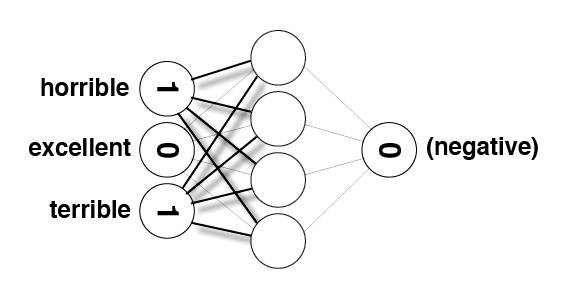

In [216]:
Image(filename='images/sentiment_network_sparse_2.png')

In [221]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common(20)

[('edie', 4.6913478822291435),
 ('antwone', 4.477336814478207),
 ('din', 4.406719247264253),
 ('gunga', 4.189654742026425),
 ('goldsworthy', 4.174387269895637),
 ('gypo', 4.0943445622221),
 ('yokai', 4.0943445622221),
 ('paulie', 4.07753744390572),
 ('visconti', 3.9318256327243257),
 ('flavia', 3.9318256327243257),
 ('blandings', 3.871201010907891),
 ('kells', 3.871201010907891),
 ('brashear', 3.8501476017100584),
 ('gino', 3.828641396489095),
 ('deathtrap', 3.8066624897703196),
 ('harilal', 3.713572066704308),
 ('panahi', 3.713572066704308),
 ('ossessione', 3.6635616461296463),
 ('tsui', 3.6375861597263857),
 ('caruso', 3.6375861597263857)]

In [222]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:20]

[('boll', -4.969813299576001),
 ('uwe', -4.624972813284271),
 ('thunderbirds', -4.127134385045092),
 ('beowulf', -4.110873864173311),
 ('dahmer', -3.9889840465642745),
 ('wayans', -3.9318256327243257),
 ('ajay', -3.871201010907891),
 ('grendel', -3.871201010907891),
 ('awfulness', -3.6635616461296463),
 ('seagal', -3.644143560272545),
 ('steaming', -3.6375861597263857),
 ('welch', -3.6109179126442243),
 ('deathstalker', -3.5553480614894135),
 ('sabretooth', -3.4339872044851463),
 ('interminable', -3.4339872044851463),
 ('forwarding', -3.4011973816621555),
 ('devgan', -3.367295829986474),
 ('gamera', -3.332204510175204),
 ('varma', -3.295836866004329),
 ('picker', -3.295836866004329)]

In [69]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [225]:
hist, edges = np.histogram(list(map(lambda x:x[1],pos_neg_ratios.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

In [226]:
frequency_frequency = Counter()

for word, cnt in total_counts.most_common():
    frequency_frequency[cnt] += 1

In [227]:
hist, edges = np.histogram(list(map(lambda x:x[1],frequency_frequency.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="The frequency distribution of the words in our corpus")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

# Project 6: Reducing Noise by Strategically Reducing the Vocabulary<a id='project_6'></a>

**TODO:** Improve `SentimentNetwork`'s performance by reducing more noise in the vocabulary. Specifically, do the following:
* Copy the `SentimentNetwork` class from the previous project into the following cell.
* Modify `pre_process_data`:
>* Add two additional parameters: `min_count` and `polarity_cutoff`
>* Calculate the positive-to-negative ratios of words used in the reviews. (You can use code you've written elsewhere in the notebook, but we are moving it into the class like we did with other helper code earlier.)
>* Andrew's solution only calculates a postive-to-negative ratio for words that occur at least 50 times. This keeps the network from attributing too much sentiment to rarer words. You can choose to add this to your solution if you would like.  
>* Change so words are only added to the vocabulary if they occur in the vocabulary more than `min_count` times.
>* Change so words are only added to the vocabulary if the absolute value of their postive-to-negative ratio is at least `polarity_cutoff`
* Modify `__init__`:
>* Add the same two parameters (`min_count` and `polarity_cutoff`) and use them when you call `pre_process_data`

In [23]:
import time
import sys
import numpy as np

class SentimentNetwork:
    
    def __init__(self, reviews, labels, polarity_cutoff, min_count, hidden_nodes = 10, learning_rate = 0.1):

        self.min_count = min_count
        self.polarity_cutoff = polarity_cutoff
        np.random.seed(1)
        self.pre_process_data(reviews, labels)
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        positive_words = Counter()
        negative_words = Counter()
        total_words = Counter()
        pos_neg_ratio = Counter()
        
        for i in range(len(reviews)):
            if labels[i] == 'POSITIVE':
                for word in reviews[i].split():
                    positive_words[word] += 1
                    total_words[word] += 1
            else:
                for word in reviews[i].split():
                    negative_words[word] += 1
                    total_words[word] += 1 
        
        for i in positive_words:
            pos_neg_ratio[i] = np.log(positive_words[i]/(1+negative_words[i]))
        
        
        self.review_vocab = set()
        
        for review in reviews:
            for word in review.split():
                if(total_words[word]>self.min_count and abs(pos_neg_ratio[word])>self.polarity_cutoff):
                    self.review_vocab.add(word)
        
        self.review_vocab = list(self.review_vocab)
        
        label_vocab = {'POSITIVE', 'NIGATIVE'}
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {'POSITIVE':1, 'NEGATIVE':0}
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate

        self.l1 = np.zeros((1,hidden_nodes))
        self.w1 = np.random.rand(input_nodes, hidden_nodes)/10
        self.w2 = np.random.rand(hidden_nodes, output_nodes)/10
                 
    def get_target_for_label(self,label):

        if label == 'POSITIVE':
            return 1
        return 0
        
    def sigmoid(self,x):
        
        return 1/(1+np.exp(-x))   

    def train(self, training_reviews_raw, training_labels):
        
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split():
                if word in self.word2index.keys():
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))    
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        start = time.time()

        for i in range(len(training_reviews)):
            
            self.l1 *= 0
            x = training_reviews[i]       
            y = self.get_target_for_label(training_labels[i])
            
            for index in x:    
                self.l1 += self.w1[index]
                
            # l1 = np.matmul(self.l0, self.w1)
            l2 = self.sigmoid(np.matmul(self.l1, self.w2))
        
            l2_error = (y-l2)
            l2_delta = l2_error*l2*(1-l2)
            
            l1_error = np.matmul(l2_delta, self.w2.T)
            l1_delta = l1_error

            self.w2 += self.learning_rate*np.matmul(self.l1.T, l2_delta)
            
            for index in x:
                self.w1[index] += (self.learning_rate*l1_delta[0])
              
            if abs(y-l2) < 0.5:
                correct_so_far += 1

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            if((i+1)%200 == 0):
                sys.stdout.write("\rProgress:" + str(100 * (i+1)/float(len(training_reviews)))[:4] + 
                                 "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + 
                                 " Correct:" + str(correct_so_far) + " Trained:" + str(i+1) + 
                                 " Training Accuracy:" + str(correct_so_far * 100 / float(i))[:4] + "%")                
    
    def test(self, testing_reviews, testing_labels):

        correct = 0
        start = time.time()
        
        for i in range(len(testing_reviews)):
            
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            if((i+1)%200 == 0):
                sys.stdout.write("\rProgress:" + str(100 * (i+1)/float(len(testing_reviews)))[:4] + 
                                 "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + 
                                 " Correct:" + str(correct) + " Tested:" + str(i) + 
                                 " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
            sys.stdout.flush()
    
    def run(self, review):
        
        indices = set()
        for word in review.split():
            if word in self.word2index.keys():
                indices.add(self.word2index[word])
        
        self.l1 *= 0
        for index in indices:
             self.l1 += self.w1[index]
                
        # l1 = np.matmul(self.l0, self.w1)
        l2 = self.sigmoid(np.matmul(self.l1, self.w2))
        
        if l2 > 0.5:
            return 'POSITIVE'
        return 'NEGATIVE' 

Run the following cell to train your network with a small polarity cutoff.

In [26]:
mlp = SentimentNetwork(reviews,labels,min_count=20,polarity_cutoff=0.05,learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:100.% Speed(reviews/sec):1594. Correct:19947 Trained:24000 Training Accuracy:83.1%

And run the following cell to test it's performance. It should be 

In [27]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:100.% Speed(reviews/sec):1375. Correct:853 Tested:999 Testing Accuracy:85.3%

Run the following cell to train your network with a much larger polarity cutoff.

In [33]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.8,learning_rate=0.1)

In [34]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:100.% Speed(reviews/sec):9324. Correct:20384 Trained:24000 Training Accuracy:84.9%

And run the following cell to test it's performance.

In [35]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:100.% Speed(reviews/sec):2213. Correct:802 Tested:999 Testing Accuracy:80.2%

## Analysis: What's Going on in the Weights?<a id='lesson_7'></a>

In [37]:
mlp_full = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,polarity_cutoff=0,learning_rate=0.1)

In [38]:
mlp_full.train(reviews[:-1000],labels[:-1000])

Progress:100.% Speed(reviews/sec):1360. Correct:19552 Trained:24000 Training Accuracy:81.4%

In [41]:
def get_most_similar_words(focus = "horrible"):
    most_similar = Counter()

    for word in mlp_full.word2index.keys():
        most_similar[word] = np.dot(mlp_full.w1[mlp_full.word2index[word]],mlp_full.w1[mlp_full.word2index[focus]])
    
    return most_similar.most_common()

In [42]:
get_most_similar_words("excellent")

[('excellent', 1.256207953769291),
 ('perfect', 1.1998166347797106),
 ('amazing', 0.9311141332806463),
 ('wonderful', 0.9289350325710931),
 ('great', 0.9079456644764975),
 ('fun', 0.8652160521014073),
 ('best', 0.8572387020304588),
 ('today', 0.8411813992861646),
 ('superb', 0.7848400369543573),
 ('job', 0.7515692974992683),
 ('definitely', 0.7105486920583712),
 ('rare', 0.7020769979010824),
 ('liked', 0.700096419583075),
 ('favorite', 0.6731830545379892),
 ('enjoyed', 0.6526678325249781),
 ('loved', 0.647135385734216),
 ('fantastic', 0.6239740891350412),
 ('fascinating', 0.6169017657961344),
 ('expecting', 0.6168018247283675),
 ('atmosphere', 0.6149790916390689),
 ('highly', 0.6083977640358289),
 ('always', 0.5972538928278593),
 ('strong', 0.5872248587077936),
 ('masterpiece', 0.582326891670401),
 ('incredible', 0.5794131390171159),
 ('bit', 0.560192299608595),
 ('perfectly', 0.5577434297530665),
 ('especially', 0.5569129851658419),
 ('enjoyable', 0.5532481499484031),
 ('believable', 

In [43]:
get_most_similar_words("terrible")

[('worst', 1.8508891799245517),
 ('awful', 1.3460453291409542),
 ('waste', 1.2646712633773785),
 ('poor', 1.188435650666779),
 ('boring', 1.0104482131690213),
 ('terrible', 1.0049883204220063),
 ('fails', 0.8716309709742568),
 ('dull', 0.8298952735378101),
 ('unfortunately', 0.8283403828875151),
 ('disappointing', 0.8269212761108468),
 ('stupid', 0.8187386046785716),
 ('annoying', 0.7942544725476316),
 ('poorly', 0.7883528045038858),
 ('supposed', 0.7797795517057264),
 ('worse', 0.7783200220801656),
 ('bad', 0.7684202776775837),
 ('horrible', 0.7575812236784126),
 ('nothing', 0.755125970265919),
 ('disappointment', 0.7287700709666527),
 ('ridiculous', 0.7197708409064341),
 ('wasted', 0.6992699408165344),
 ('looks', 0.6807255301385139),
 ('mess', 0.6748338101753909),
 ('save', 0.6497343951930733),
 ('badly', 0.6475030046773779),
 ('laughable', 0.6453858120908536),
 ('disappointed', 0.6005505182740679),
 ('script', 0.5994744534757445),
 ('silly', 0.5990329139835455),
 ('lacks', 0.5950530

In [61]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)

In [63]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(mlp_full.w1[mlp_full.word2index[word]])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")

In [70]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(vectors_list)

In [72]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize,
                                    color=colors_list))

p.scatter(x="x1", y="x2", size=8, source=source, fill_color="color")

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

# green indicates positive words, black indicates negative words